In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

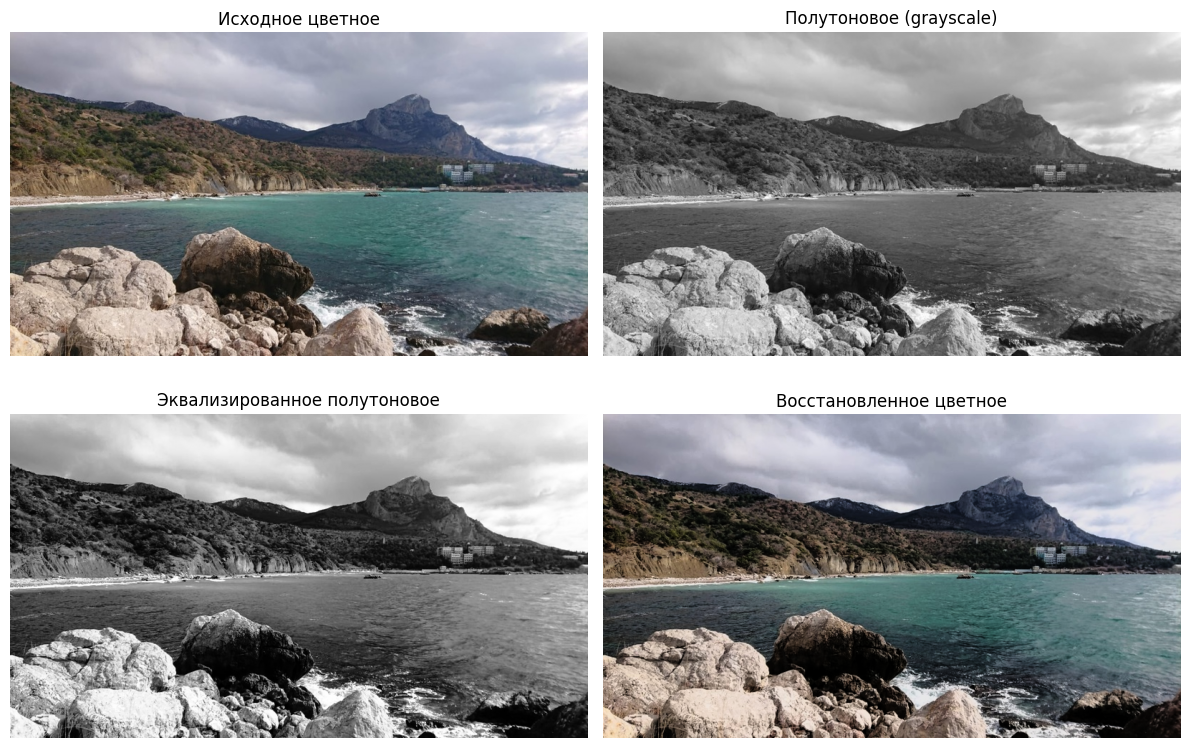

In [2]:
# === 1. Чтение исходного изображения ===
# Замените "input.jpg" на ваш путь к файлу
img_bgr = cv2.imread("input.jpg")  
if img_bgr is None:
    raise IOError("Не удалось загрузить изображение. Проверьте путь к файлу!")

# OpenCV загружает изображение в формате BGR
# Для вывода через matplotlib лучше конвертировать в RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# === 2. Преобразование в полутоновое (grayscale) ===
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# === 3. Гистограммная эквализация полутонового изображения ===
eq_gray = cv2.equalizeHist(gray)

# === 4. Восстановление цветного изображения на основе эквализированной яркости ===
# Преобразуем исходное изображение в float для корректных вычислений
img_bgr_float = img_bgr.astype(np.float32)
gray_float = gray.astype(np.float32)
eq_gray_float = eq_gray.astype(np.float32)

# Добавим небольшое число, чтобы избежать деления на ноль
epsilon = 1.0

# Создаём пустой массив для результата
reconstructed_bgr = np.zeros_like(img_bgr_float)

# Вычисляем отношение eq_gray / (gray + epsilon)
ratio = eq_gray_float / (gray_float + epsilon)

# Для каждого канала B, G, R умножаем на ratio
for c in range(3):
    reconstructed_bgr[..., c] = img_bgr_float[..., c] * ratio

# Округляем, приводим к диапазону [0, 255] и к типу uint8
# reconstructed_bgr = np.clip(reconstructed_bgr, 0, 255).astype(np.uint8) # make linear transpose



# Используем линейное преобразование:
min_val = np.min(reconstructed_bgr)
max_val = np.max(reconstructed_bgr)

# Приводим к диапазону [0..255]:
reconstructed_bgr_float = (reconstructed_bgr - min_val) * (255.0 / (max_val - min_val))

# Приводим к uint8:
reconstructed_bgr = reconstructed_bgr_float.astype(np.uint8)



# Конвертируем результат в RGB для корректного отображения в matplotlib
reconstructed_rgb = cv2.cvtColor(reconstructed_bgr, cv2.COLOR_BGR2RGB)

# === 5. Визуализация результатов ===
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Исходное изображение
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Исходное цветное")
axs[0, 0].axis("off")

# Полутоновое
axs[0, 1].imshow(gray, cmap="gray")
axs[0, 1].set_title("Полутоновое (grayscale)")
axs[0, 1].axis("off")

# Эквализированное полутоновое
axs[1, 0].imshow(eq_gray, cmap="gray")
axs[1, 0].set_title("Эквализированное полутоновое")
axs[1, 0].axis("off")

# Восстановленное цветное
axs[1, 1].imshow(reconstructed_rgb)
axs[1, 1].set_title("Восстановленное цветное")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()
